<a href="https://colab.research.google.com/github/E-girgen/Thesis-Data-Science-Society/blob/main/SVM_Not_preprocessed_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"


/content/drive/MyDrive/Colab Notebooks


In [ ]:
data = pd.read_csv("Tweets.txt", sep='\t')



In [ ]:
# Verwijder rijen waarin 'category' gelijk is aan 'other'
df = data[data['Category'] != 'other']

# Maak een nieuwe DataFrame met de gewenste kolommen
nd = df[[ 'Text', 'Category']]

# Optioneel: Als je de index wilt resetten in de nieuwe DataFrame
nd.reset_index(drop=True, inplace=True)

# Bekijk de nieuwe DataFrame
print(nd.head())

                                                Text Category
0  @LINDAnieuws Maandagmorgen en extra druk😣Dat i...    anger
1  @9Owen1 Echt...zweet en shag..en dat een hele ...    anger
2  @ohzitdatzo @telegraaf @VVD D66Pechtold zei 1e...    anger
3  @PostNL heeft mijn pakket om 17.02 bezorgd all...    anger
4  Na premiestijging ziektekosten en pensioen dit...    anger


In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
nd['Category'] = label_encoder.fit_transform(nd['Category'])

<ipython-input-8-e1ab72c6b0da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd['Category'] = label_encoder.fit_transform(nd['Category'])


In [ ]:
label_encodings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encodings)

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'neutral': 4, 'sadness': 5}


In [ ]:
nd["Text"]

0      @LINDAnieuws Maandagmorgen en extra druk😣Dat i...
1      @9Owen1 Echt...zweet en shag..en dat een hele ...
2      @ohzitdatzo @telegraaf @VVD D66Pechtold zei 1e...
3      @PostNL heeft mijn pakket om 17.02 bezorgd all...
4      Na premiestijging ziektekosten en pensioen dit...
                             ...                        
995    @interessamt Jammer dit😩voor ons zijn jullie w...
996                                  @aamberrmm ik😩HAHSH
997    @sarahelbihel Pff ik ben ook ziek echt stommm😢...
998    wow wat n heftig nieuws zeg😢ik wens je heel ve...
999    Schade na crash Rucphen! Knie bleef lang dik, ...
Name: Text, Length: 1000, dtype: object

In [ ]:
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 10 - Nauwkeurigheid: 0.37, Precisie: 0.17850877192982453, Recall: 0.20525030525030527, F1-Score: 0.1855779427359491
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        26
           1       0.00      0.00      0.00         5
           2       0.42      0.69      0.52        35
           3       0.00      0.00      0.00         3
           4       0.25      0.24      0.24        21
           5       0.00      0.00      0.00        10

    accuracy                           0.37       100
   macro avg       0.18      0.21      0.19       100
weighted avg       0.30      0.37      0.32       100



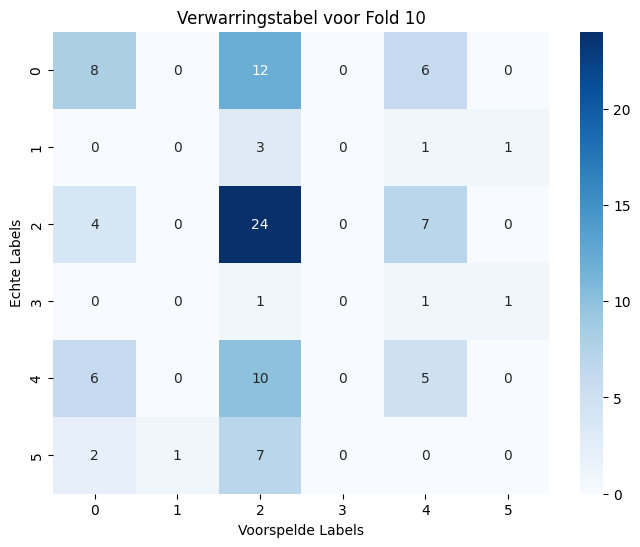


Gemiddelde scores over alle folds - Nauwkeurigheid: 0.37, Precisie: 0.17850877192982453, Recall: 0.20525030525030527, F1-Score: 0.1855779427359491


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Initialiseer een TfidfVectorizer
vectorizer = TfidfVectorizer()

fold_number = 10

# Transformeer de tekst naar vectoren
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialiseer een LabelEncoder
label_encoder = LabelEncoder()

# Encodeer de categorieën naar numerieke waarden
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Initialiseer het Support Vector Machine-model
svm = SVC()

# Definieer het parametergrid voor GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 7],
    'coef0': [0, 1, 3]
}

# Initialiseer K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Initialiseer GridSearchCV met 10-fold cross-validation en f1-macro als score
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Lijsten om resultaten per fold op te slaan
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over de folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == fold_number - 1:  # Indexen zijn 0-gebaseerd, daarom -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Voer GridSearchCV uit op de trainingsdata
        grid_search.fit(X_train, y_train)

        # Haal de beste parameters op
        best_params = grid_search.best_params_

        # Gebruik de beste parameters in je definitieve model
        final_svm = SVC(**best_params)

        # Train het model op de trainingsdata
        final_svm.fit(X_train, y_train)

        # Voorspel de categorieën op de testset
        y_pred = final_svm.predict(X_test)

        # Decodeer de voorspelde labels terug naar de originele tekstuele categorieën
        y_test_decoded = label_encoder.inverse_transform(y_test)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)

        # Bereken en sla de metingen op
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        conf_matrices.append(conf_matrix)

        print(f"Fold {fold + 1} - Nauwkeurigheid: {accuracy}, Precisie: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Druk het classificatie rapport af
        print("Classificatie Rapport:")
        print(classification_report(y_test_decoded, y_pred_decoded))

        # Plot de verwarringstabel als een heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Voorspelde Labels')
        plt.ylabel('Echte Labels')
        plt.title(f'Verwarringstabel voor Fold {fold + 1}')
        plt.show()

# Gemiddelde scores over alle folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nGemiddelde scores over alle folds - Nauwkeurigheid: {avg_accuracy}, Precisie: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")


With smote

Fold 10 - Accuracy: 0.26, Precision: 0.13888888888888887, Recall: 0.14804639804639805, F1-Score: 0.14177501970055162
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        26
           1       0.00      0.00      0.00         5
           2       0.33      0.43      0.38        35
           3       0.00      0.00      0.00         3
           4       0.17      0.19      0.18        21
           5       0.00      0.00      0.00        10

    accuracy                           0.26       100
   macro avg       0.14      0.15      0.14       100
weighted avg       0.24      0.26      0.25       100



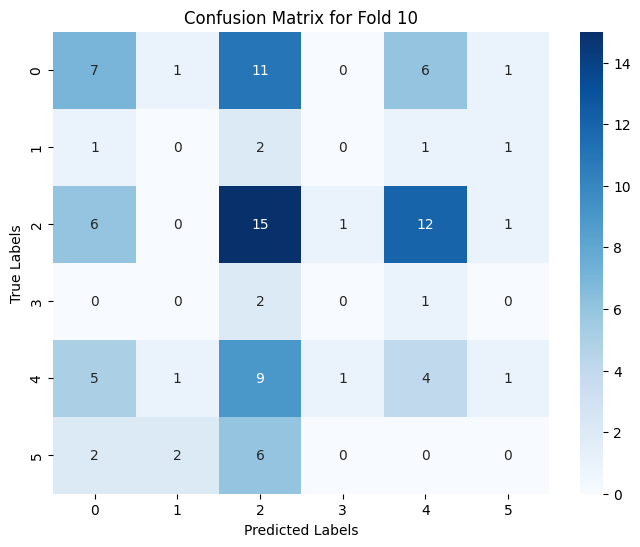


Average scores across all folds - Accuracy: 0.26, Precision: 0.13888888888888887, Recall: 0.14804639804639805, F1-Score: 0.14177501970055162


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

fold_number = 10

# Transform text to vectors
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories into numerical values
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Initialize the Support Vector Machine model
svm = SVC()

# Initialize K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Initialize GridSearchCV with 10-fold cross-validation and f1-macro as the scoring metric
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Lists to store results per fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == fold_number - 1:  # Indexes are 0-based, hence -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Apply SMOTE to balance the class distribution
        smote = SMOTE(random_state=2022)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Use the best parameters in your final model
        final_svm = SVC(**best_params)

        # Train the model on the resampled training data
        final_svm.fit(X_train_resampled, y_train_resampled)

        # Predict categories on the test set
        y_pred = final_svm.predict(X_test)

        # Decode the predicted labels back to the original textual categories
        y_test_decoded = label_encoder.inverse_transform(y_test)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)

        # Calculate and store the metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        conf_matrices.append(conf_matrix)

        print(f"Fold {fold + 1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_test_decoded, y_pred_decoded))

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for Fold {fold + 1}')
        plt.show()

# Average scores across all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nAverage scores across all folds - Accuracy: {avg_accuracy}, Precision: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")

In [ ]:
example_sentence = "Zeker, zeker. Dan ruïneert hij mijn leven gewoon en dan gaat het sowieso niet de goeie kant op. Hier is het rechtssysteem, vergeleken met Nederland, zit hier echt heel scheef in elkaar."
example_sentence_tfidf = vectorizer.transform([example_sentence])
example_pred = final_svm.predict(example_sentence_tfidf)

print(f"Voorspelde emotie voor de voorbeeldzin: {example_pred[0]}")


Voorspelde emotie voor de voorbeeldzin: 2
